On adjoint aux opérations de politique des opération de document : celles-ci ne modifient pas la structure du DAG ni ses niveaux, mais viennent prendre référence à une des opérations qui la composent. On a jusqu'alors testés les mécanismes de validation de la politique, on doit désormais tester ceux mettant en œuvre celle-ci, en vérifiant :

- que les opérations de document sont bien acceptables dans un intervalle
- que l'on peut calculer l'intervalle de validité selon plusieurs stratégies
- que plusieurs opérations dans un même niveau peuvent avoir différentes validités selon les bornes (intervalle) et les exclusions

::: {.callout-note appearance="simple"}
On fait suivre des opérations leur log d'exécution correspondant ligne par ligne (indiquée tout à gauche selon le format `<numéro d'algorithme>.<numéro de ligne>`) aux algorithmes de [04-proposition](https://gitlab.inria.fr/coast-team/crdt-ac/notes/-/blob/main/04-proposition.tex).
:::

In [1]:
#| hide
import sys
sys.path.insert(0, '/home/rigelk/Code/thesis-implementation/')
from crdt.dag import DAG
from rich.jupyter import print

G_b = DAG()
G_b.key = 'C'
G_b.add_op('a1', ['0'], last='c1')
G_b.add_op('b1', ['0'])
G_b.add_op('c1', ['0'])  # first document op. of level 1
G_b.add_op('c2', ['0'])  # second document op. of level 1
G_b.add_op('c3', ['b1'])  # doc. op. beyond valid path

In [2]:
#| echo: false
print(G_b.pop_log())

1.28 effect(a1, ['0'])
1.29   G.addEdge((0) → (a1))
1.30   D = <c1 (LastDotSeen), [] (MissingDots)>
1.28 effect(b1, ['0'])
1.29   G.addEdge((0) → (b1))
1.30   D = <None (LastDotSeen), [] (MissingDots)>
1.28 effect(c1, ['0'])
1.29   G.addEdge((0) → (c1))
1.30   D = <None (LastDotSeen), [] (MissingDots)>
1.28 effect(c2, ['0'])
1.29   G.addEdge((0) → (c2))
1.30   D = <None (LastDotSeen), [] (MissingDots)>
1.28 effect(c3, ['b1'])
1.29   G.addEdge((b1) → (c3))
1.30   D = <None (LastDotSeen), [] (MissingDots)>

In [3]:
#| echo: false
print(f"opérations invalides : {G_b.pol_invalides}")
print(G_b.pop_log())

opérations invalides : []

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       pol_invalides()
       estValide(0)
1.37     concurrents de 0 : ∅
1.38     conflits de 0 : ∅
1.39     vérification de validité des parents ([]) de 0
1.39     ret valide
       estValide(a1)
1.37     concurrents de a1 : ['b1', 'c1', 'c2', 'c3']
1.38     conflits de a1 : ['c3']
1.39     conflits perdus : ∅
1.39     vérification de validité des parents (['0']) de a1
cache    estValide(0) → valide
1.39     ret valide
       estValide(b1)
1.37     concurrents de b1 : ['a1', 'c1', 'c2']
1.38     conflits de b1 : ∅
1.39     vérification de validité des parents (['0']) de b1
cache    estValide(0) → valide
1.39     ret valide
       ret []

### Validité d'une opération de politique changée dans un tuple d'accès

In [4]:
#| echo: true
G_b.add_op('b2', ['b1'])
G_b.add_op('c4', ['b2'])  # doc. op. with no pol. op. after

::: {.column-margin}
L'opération `b2` doit être retournée comme invalide dans le tuple actuel.
:::

In [5]:
#| echo: false
print(f"opérations invalides : {G_b.pol_invalides}")
print(G_b.pop_log())

opérations invalides : ['b2']

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        1.28 effect(b2, ['b1'])
1.29   G.addEdge((b1) → (b2))
1.30   D = <None (LastDotSeen), [] (MissingDots)>
1.28 effect(c4, ['b2'])
1.29   G.addEdge((b2) → (c4))
1.30   D = <None (LastDotSeen), [] (MissingDots)>
     pol_invalides()
       estValide(0)
1.37     concurrents de 0 : ∅
1.38     conflits de 0 : ∅
1.39     vérification de validité des parents ([]) de 0
1.39     ret valide
       estValide(a1)
1.37     concurrents de a1 : ['b1', 'c1', 'c2', 'c3', 'b2', 'c4']
1.38     conflits de a1 : ['c3', 'b2']
1.39     conflits perdus : ∅
1.39     vérification de validité des parents (['0']) de a1
cache    estValide(0) → valide
1.39     ret valide
       estValide(b1)
1.37     concurrents de b1 : ['a1', 'c1', 'c2']
1.38     conflits de b1 : ∅
1.39     vérification de validité des parents (['0']) de b1
cache    estValide(0) → valide
1.39     ret valide
       estValide(b2)
cache    estValide(a1) → valide
1.37     concurrents de b2 : ['a1', 'c1', 'c2', 'c3']
1.38     conflits de b2 : ['a1', 'c1', 'c2']
cache    estValide(a1) → valide
1.39     conflits perdus : ['a1']
1.39     vérification de validité des parents (['b1']) de b2
cache    estValide(b1) → valide
1.39     ret invalide → (∧ conflits gagnés 🔴) ∧ (∧ prédecesseurs directs valides 🟢)
       ret ['b2']

In [6]:
#| echo: false
print(f"plus long chemin valide : {G_b._longest_valid_path()}")
print(G_b.pop_log())

plus long chemin valide : ['0', 'a1']

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               _longest_valid_path()
       estValide(b2)
cache    estValide(a1) → valide
1.37     concurrents de b2 : ['a1', 'c1', 'c2', 'c3']
1.38     conflits de b2 : ['a1', 'c1', 'c2']
cache    estValide(a1) → valide
1.39     conflits perdus : ['a1']
1.39     vérification de validité des parents (['b1']) de b2
cache    estValide(b1) → valide
1.39     ret invalide → (∧ conflits gagnés 🔴) ∧ (∧ prédecesseurs directs valides 🟢)
       calcul pour a1
       estValide(a1)
1.37     concurrents de a1 : ['b1', 'c1', 'c2', 'c3', 'b2', 'c4']
1.38     conflits de a1 : ['c3', 'b2']
1.39     conflits perdus : ∅
1.39     vérification de validité des parents (['0']) de a1
cache    estValide(0) → valide
1.39     ret valide
       ret ['0', 'a1']

### Validité d'une opération de document dans un tuple d'accès

Après avoir inspecté le déroulement d'opérations de politique et de leur chaîne d'évaluations via la fonction `estValide` du CRDTp, on peut s'attaquer à l'évaluation de la validité d'une opération de document en rapport avec ces dernières. C'est la fonction `aLeDroit` de l'implémentation, qui correspond à la fonction `estValide` du CRDTd, qui est appelé et dont l'exécution est inspectée :

In [7]:
#| echo: false
print(f"c1 est {'valide' if G_b.aLeDroit('c1') else 'invalide'} :")
print(G_b.pop_log())

c1 est valide :

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              2.17 estValide(c1)
       pol_invalides()
         estValide(0)
1.37       concurrents de 0 : ∅
1.38       conflits de 0 : ∅
1.39       vérification de validité des parents ([]) de 0
1.39       ret valide
         estValide(a1)
1.37       concurrents de a1 : ['b1', 'c1', 'c2', 'c3', 'b2', 'c4']
1.38       conflits de a1 : ['c3', 'b2']
1.39       conflits perdus : ∅
1.39       vérification de validité des parents (['0']) de a1
cache      estValide(0) → valide
1.39       ret valide
         estValide(b1)
1.37       concurrents de b1 : ['a1', 'c1', 'c2']
1.38

In [8]:
#| echo: false
print(f"c2 est {'valide' if G_b.aLeDroit('c2') else 'invalide'} :")
print(G_b.pop_log())

c2 est invalide :

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

### Évaluation graphique de l'ensemble

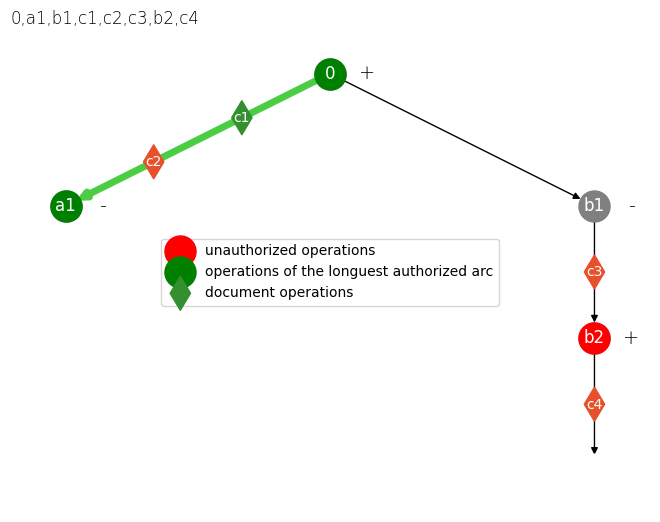

In [9]:
#| fig-align: center
G_b.draw()

On a ci-avant un exemple qui rassemble plusieurs difficultés : les opérations de document sont parfois plusieurs sur une arête, parfois hors du plus long chemin valide, parfois après une opération de politique qui n'est pas suivie par une autre (obligeant à créer une fausse arête).

In [10]:
#| echo: false
%matplotlib widget
from crdt.dag import DAG
from rich.pretty import pprint
from ipywidgets import widgets
import matplotlib.pyplot as plt

ops = [
  ('a1', ['0'], 'c1'),
  ('b1', ['0'], '0'),
  ('b2', ['b1'], '0'),
  ('c1', ['0'], '0'),
  ('c2', ['0'], '0'),
  ('c3', ['b1'], '0'),
  ('c4', ['b2'], '0')
]

@widgets.interact(step=widgets.IntSlider(min=0, max=len(ops), step=1, value=len(ops), description="étape", continuous_update=False))
def update(step):
  G_x = DAG()
  G_x.clear() # clear graph
  plt.clf() # clear plot
  G_x.key = 'C'
  for i in range(0, step):
    G_x.add_op(ops[i][0], ops[i][1], last=ops[i][2])
  plt.title(label=",".join(G_x.ops), fontweight=10, loc='left')
  G_x.draw()

interactive(children=(IntSlider(value=7, continuous_update=False, description='étape', max=7), Output()), _dom…